# Steps

1. Importing thr libraries
2. Importing the datasets
3. Data cleaning, Data Exploration, Data Manipulation, Data Visualisation
4. EDA - Exploratory Data Analysis
5. Spliting the datasets
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evalution
10. [Optional] Export thr Dataset into the .csv format

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Importing the dataset

Link: https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Linear%20Regression%20Baltimore-Salary%20Prediction/train.csv


In [20]:
df=pd.read_csv("https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Linear%20Regression%20Baltimore-Salary%20Prediction/train.csv")

In [4]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


# Problem Statement

Given a dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.

In [5]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [6]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [7]:
df.shape

(18981, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [9]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Jackson,Larry",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [10]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [22]:
#Making a copy of the original DataFrame
newdf=df.copy()

In [24]:
#Removing the leading and trailing spaces and converting all the columns  into the lower case
newdf.columns=df.columns.str.strip().str.lower() #<- you have to write str function here, for convert the object types into string. After that convert it into lower form

In [25]:
newdf.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [26]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [27]:
# checking for null values
newdf.isnull().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

In [32]:
# Delete the column Grosspay
newdf.drop("grosspay",axis=1,inplace=True)

In [33]:
newdf

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00


In [34]:
newdf.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18981, dtype: object

In [38]:
#number of unique values in DataFrame
newdf.nunique()

name            18788
jobtitle         1075
agencyid         1177
agency             65
hiredate         4737
annualsalary     1590
dtype: int64

In [52]:
#It shows how many of same agencyid in column
newdf["agencyid"].value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02685      1
W02696      1
W02678      1
W02669      1
W02653      1
Name: agencyid, Length: 1177, dtype: int64

In [53]:
newdf.jobtitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
SPECIAL ASST DIRECTOR OF PUBLI       1
CIRCULATION SYSTEMS MANAGER LI       1
HYDRAULIC MECHANIC                   1
SOUND EQUIPMENT TECHNICIAN           1
LIBRARY COMPUTER SYSTEMS ADMIN       1
Name: jobtitle, Length: 1075, dtype: int64

In [54]:
newdf.annualsalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     163
             ... 
$47867.00       1
$21778.00       1
$53700.00       1
$66315.00       1
$31842.00       1
Name: annualsalary, Length: 1590, dtype: int64

In [61]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [60]:
#Remove the $ from the annualsalary column and change the dtype to integer
re.sub("\$","",newdf.annualsalary[0])   #<- you have to write \$ for remove the frist $ symbol. bcoz otherwise $ is also used for t=showsing the ending term in re.sub

'11310.00'

In [62]:
for i in range(len(newdf.annualsalary)):
    newdf.annualsalary[i]=re.sub("\$","",newdf.annualsalary[i])

In [64]:
newdf

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.00
...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.00
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.00
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.00
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.00


In [65]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18981 non-null  object
 1   jobtitle      18981 non-null  object
 2   agencyid      18981 non-null  object
 3   agency        18981 non-null  object
 4   hiredate      18911 non-null  object
 5   annualsalary  18981 non-null  object
dtypes: object(6)
memory usage: 889.9+ KB


In [72]:
newdf.annualsalary.astype(float)

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: annualsalary, Length: 18981, dtype: float64

In [70]:
newdf.annualsalary=newdf.annualsalary.astype(float)

In [71]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hiredate      18911 non-null  object 
 5   annualsalary  18981 non-null  float64
dtypes: float64(1), object(5)
memory usage: 889.9+ KB


In [73]:
newdf.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0


In [ ]:
# Separate the hiredate column in 3 different parts and add it to the index place of hiredate
# hiredate= hireday, hiremonth, hireyear(int)

In [74]:
re.sub("/.*","",str(newdf.hiredate[0]))

'06'

In [80]:
re.sub("^\d\d/|/\d{4}","",str(newdf.hiredate[0]))

'10'

In [81]:
re.sub("\d\d/","",str(newdf.hiredate[0]))

'2013'

In [89]:
hireday=[]
hiremonth=[]
hireyear=[]
for i in range(len(newdf.hiredate)):
    hireday.append(re.sub("/.*","",str(newdf.hiredate[i])))
    hiremonth.append(re.sub("^\d\d/|/\d{4}","",str(newdf.hiredate[i])))
    hireyear.append(re.sub("\d\d/","",str(newdf.hiredate[i])))

In [91]:
newdf.insert(4,"hireday",hireday)
newdf.insert(5,"hiremonth",hiremonth)
newdf.insert(6,"hireyear",hireyear)

In [92]:
newdf

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06,10,2013,06/10/2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,10/24/1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09,25,2006,09/25/2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07,23,2009,07/23/2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07,24,2013,07/24/2013,43999.0
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05,21,2014,05/21/2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05,21,2014,05/21/2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12,17,2013,12/17/2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01,23,2013,01/23/2013,44104.0


In [93]:
newdf.drop("hiredate",axis=1,inplace=True)

In [94]:
newdf

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07,24,2013,43999.0
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05,21,2014,11310.0
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05,21,2014,11310.0
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12,17,2013,43999.0
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01,23,2013,44104.0


In [146]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18981 non-null  object 
 1   jobtitle      18981 non-null  object 
 2   agencyid      18981 non-null  object 
 3   agency        18981 non-null  object 
 4   hireday       18981 non-null  object 
 5   hiremonth     18981 non-null  object 
 6   hireyear      18981 non-null  object 
 7   annualsalary  18981 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


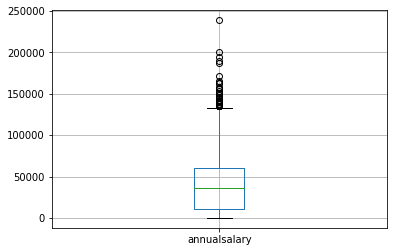

In [98]:
# Plot a boxplot for the annualsalary column
newdf.annualsalary.plot.box()
plt.grid()

<AxesSubplot:xlabel='jobtitle'>

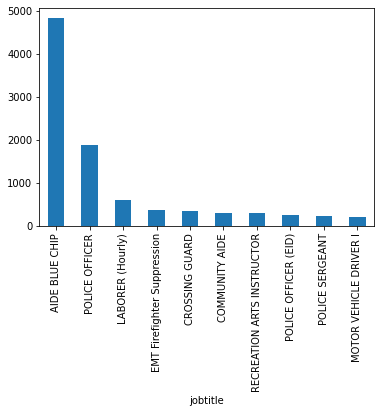

In [101]:
#Plot the top 10 jobs based on hiring
newdf.groupby(["jobtitle"])["name"].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='jobtitle'>

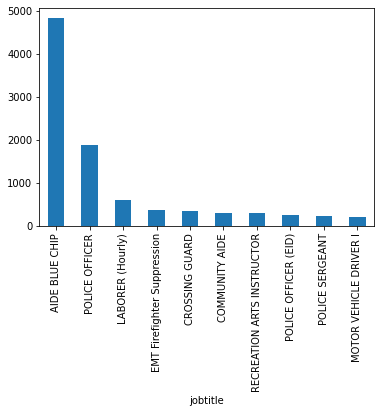

In [110]:
#plot the top 10 jobs with the highest salary
newdf.groupby(["jobtitle"])["annualsalary"].count().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='agencyid'>

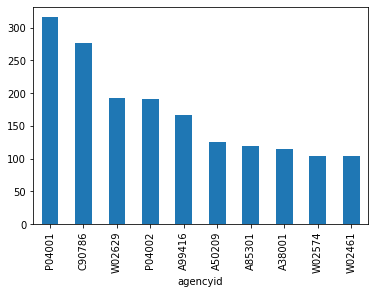

In [114]:
#plot top 10 Agency's ID that has highest number of Employees
newdf.groupby(["agencyid"])["name"].count().sort_values(ascending=False).head(10).plot.bar()

In [120]:
newdf.annualsalary.max()

238772.0

<Axes:xlabel='hireyear'>

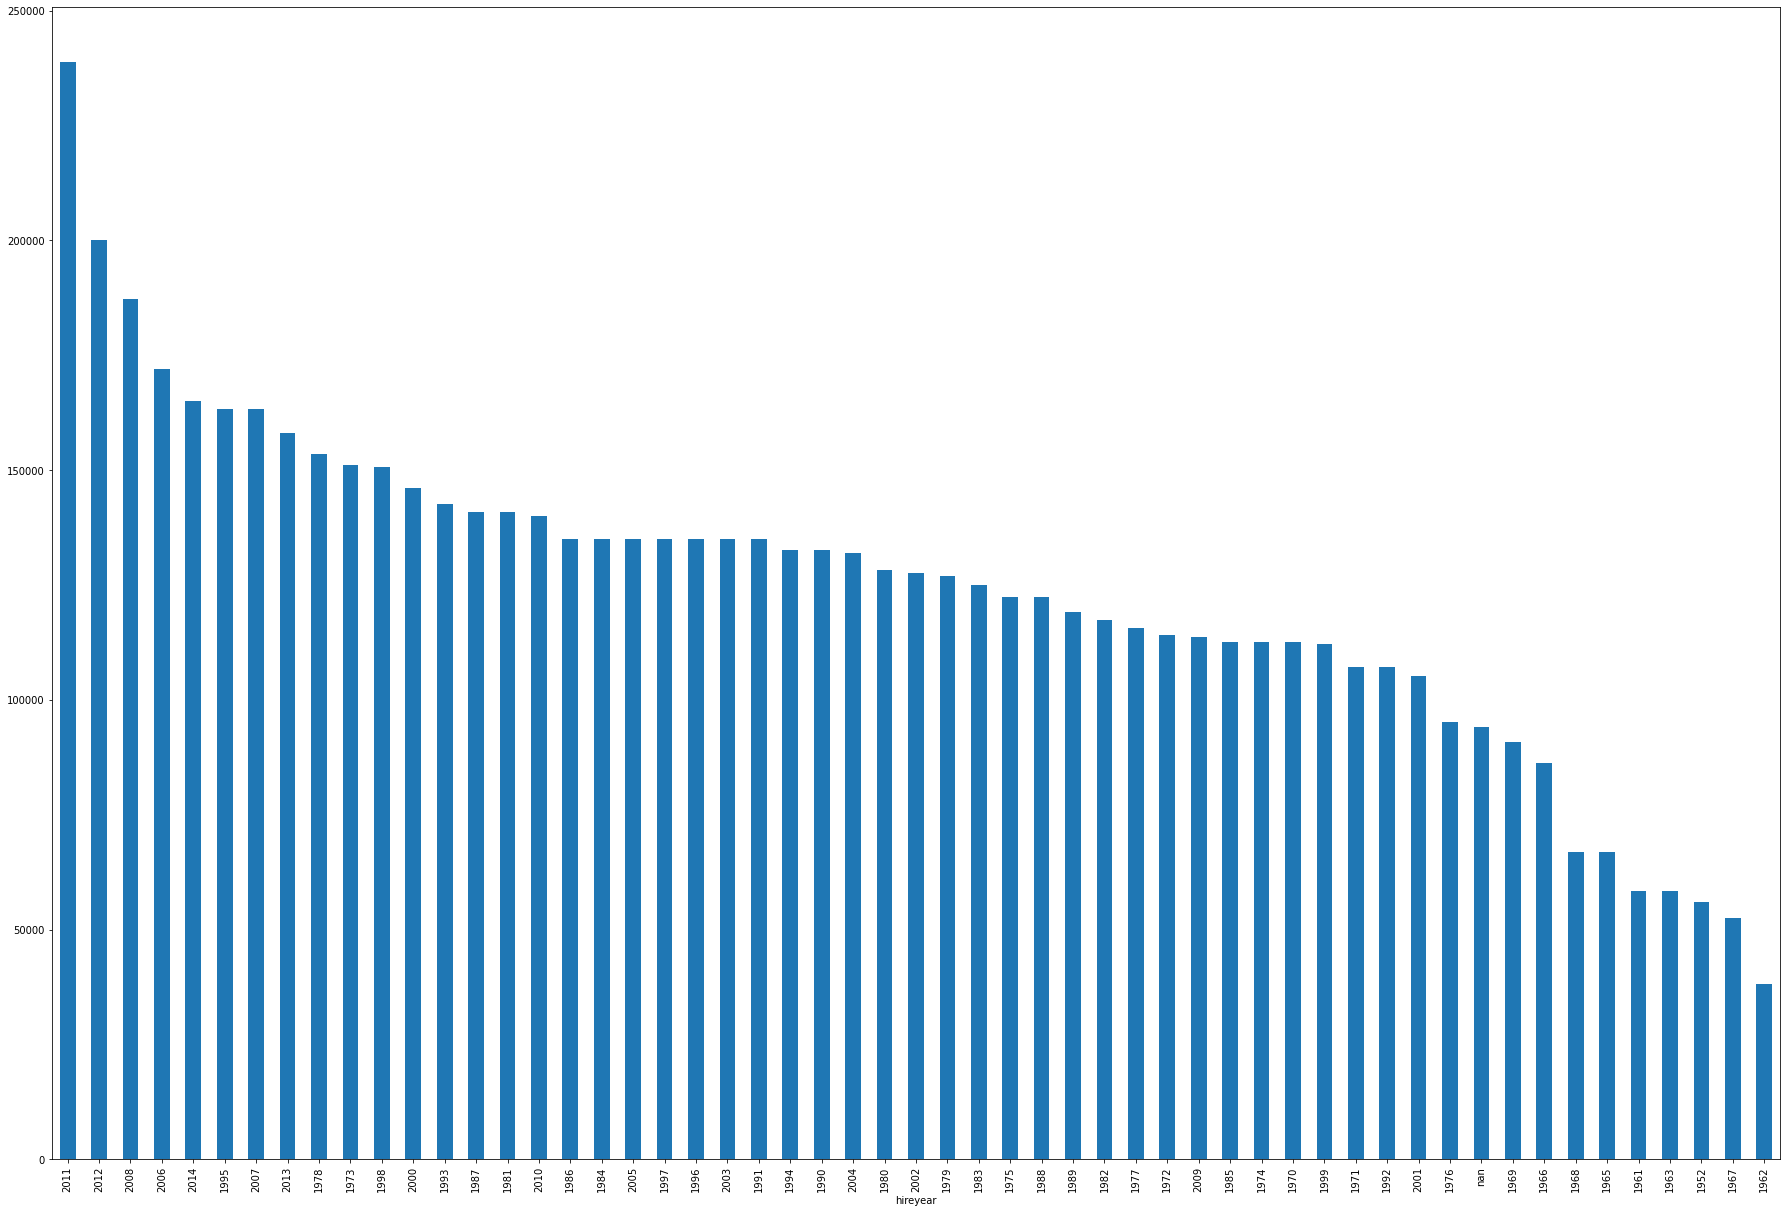

In [143]:
#plot the Highest Salary V/s year graph
fig= plt.figure()
ax=fig.add_axes([1,1,4,4])  #<- this both line will increase the size of the graph
newdf.groupby(["hireyear"])["annualsalary"].max().sort_values(ascending=False).plot.bar()

In [126]:
newdf.annualsalary.mean()

39756.791967757235

<Axes:xlabel='hireyear'>

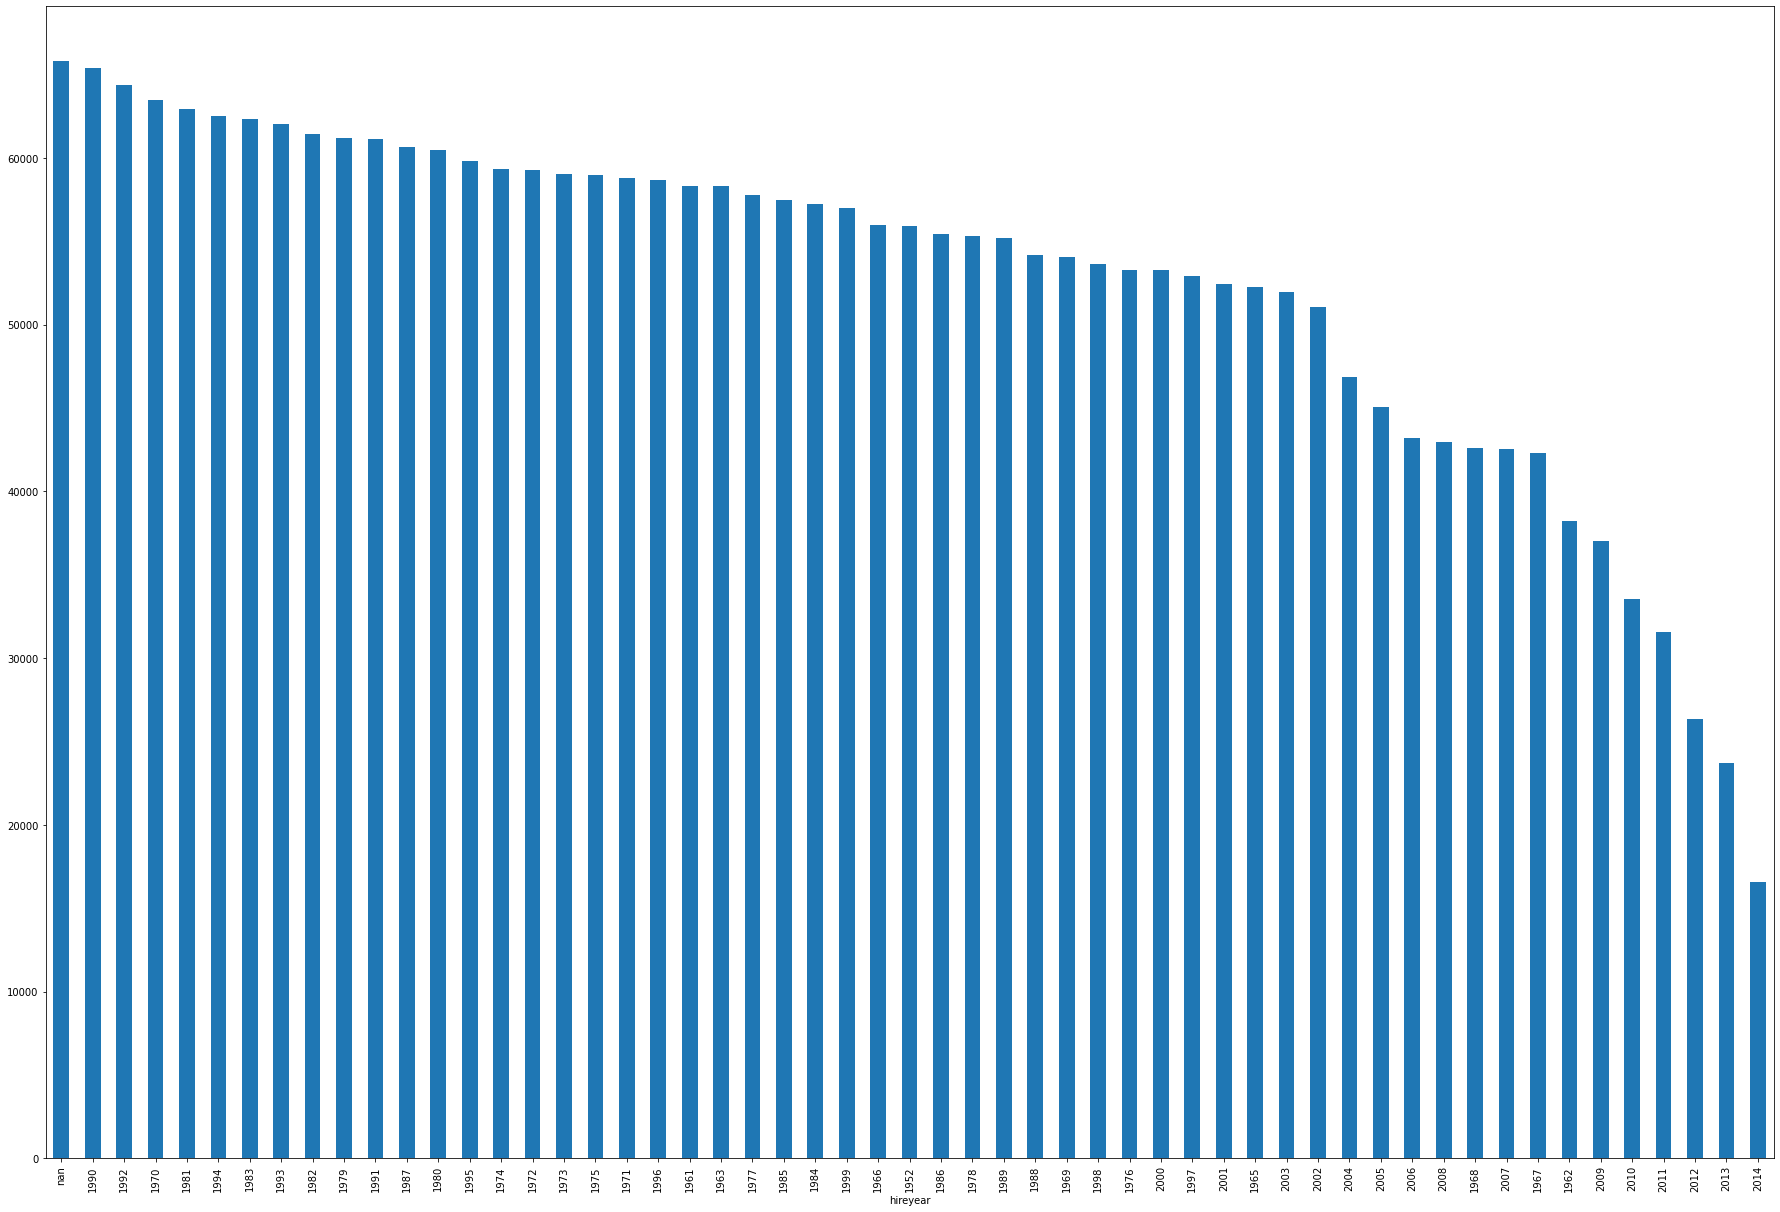

In [144]:
#plot the Average Salary V/s year graph
fig=plt.figure()
ax=fig.add_axes([1,1,4,4])
newdf.groupby(["hireyear"])["annualsalary"].mean().sort_values(ascending=False).plot.bar()

In [154]:
newdf.head()

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06,10,2013,11310.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09,25,2006,68300.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07,23,2009,62000.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07,24,2013,43999.0


<AxesSubplot:xlabel='hireyear'>

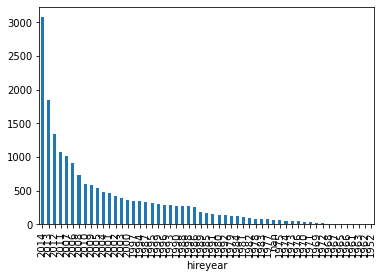

In [165]:
#plot a graph to check on which year most of the people are hired
newdf.groupby(["hireyear"])["jobtitle"].count().sort_values(ascending=False).plot.bar()

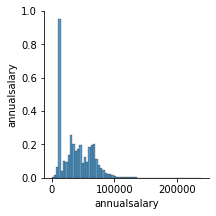

In [168]:
#plot a pairplot
sns.pairplot(newdf,height=3)   #<- Here, 

In [169]:
newdf.corr()

,annualsalary
annualsalary,1.0


In [172]:
newdf.hireday.astype(float)
newdf.hiremonth.astype(float)
newdf.hireyear.astype(float)

0        2013.0
1        1979.0
2        2006.0
3        2009.0
4        2013.0
          ...  
18976    2014.0
18977    2014.0
18978    2013.0
18979    2013.0
18980    1979.0
Name: hireyear, Length: 18981, dtype: float64